In [51]:
### Script to read shoes dataset downloaded from ... into a tensor

import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.ndimage.morphology import binary_dilation as dilation
from scipy.ndimage import generate_binary_structure

In [ ]:
# open folder
root = '/Users/tonicreswell/Documents/PhD_Yr1/Projects/Project9_sketchGAN/InData/png'

# for each folder open sub dir (each sub dir is a label)

yData = [] #sketches
xData = [] #labels

labelNames = os.listdir(root)[:3]
print labelNames

#dilation structure to make lines thicker
structure=generate_binary_structure(2,10)

labelCounter=0
for folder in labelNames:
    images = os.listdir(os.path.join(root, folder))
    for image in images:
        if image.endswith('.png'):
            im = imread(os.path.join(root, folder, image))
            imBinary = im>0 #values 0, 255
            imDilate = dilation(~im, structure=structure)
            xData.append((imDilate*1))
            yData.append(labelCounter)
    labelCounter+=1 #move on to next label

['present', 'apple', 'diamond']


In [118]:
xData[0].min(), xData[0].max(), np.unique(xData[0]), np.shape(xData[0])

(0, 1, array([0, 1]), (1111, 1111))

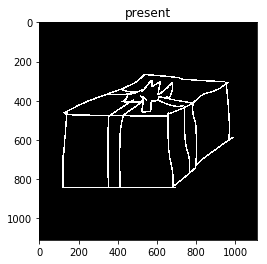

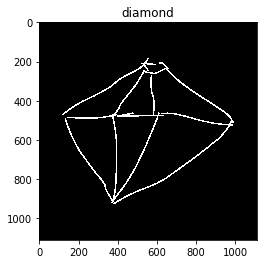

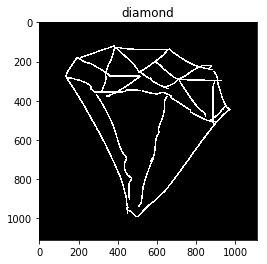

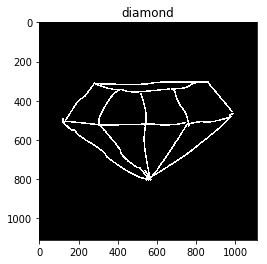

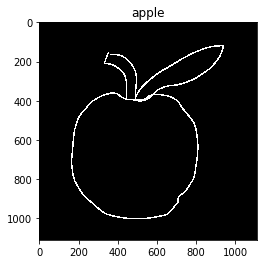

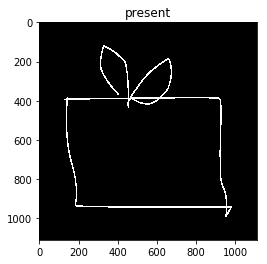

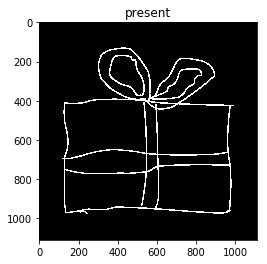

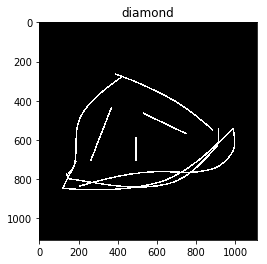

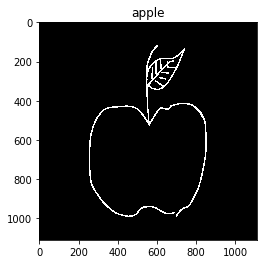

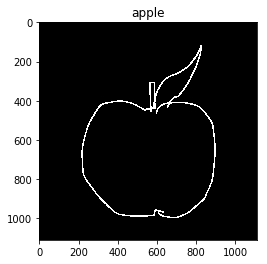

In [119]:
#show 10 examples
for i in range(10):
    eg = np.random.randint(len(xData))
    plt.figure()
    plt.imshow(xData[eg], cmap='gray')
    eg_label = labelNames[yData[eg]]
    plt.title(eg_label)

In [39]:
#print out image details
xTensor = np.asarray(xData, dtype='uint8')
print 'imTensor shape:', np.shape(xTensor)
yTensor = np.asarray(yData)
print 'Label Tensor shape:', np.shape(yTensor)

print 'imTensor range: [',xTensor.min(), xTensor.max(), ']'
print 'im Labels set: {', np.unique(yTensor),'}'

imTensor shape: (240, 1111, 1111)
Label Tensor shape: (240,)
imTensor range: [ 0 255 ]
im Labels set: { [0 1 2] }


In [6]:
#save the image, and label lists as tensors
np.save('../../InData/SHOES/xSketches.npy', xTensor)
np.save('../../InData/SHOES/ySketches.npy', yTensor)

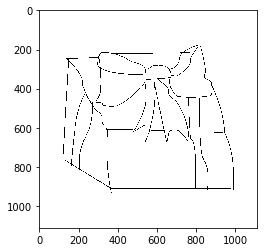

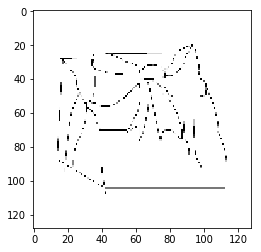

In [43]:
im = xTensor[eg]
im128 = resize(im, (128,128))
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(im128, cmap='gray')

In [ ]:
#Load and shuffel the datasets
xShoes = np.load('../../InData/SHOES/xShoes.npy')
yShoes = np.load('../../InData/SHOES/yShoes.npy')
fineY = np.load('../../InData/SHOES/fineYShoes.npy')
subfineY = np.load('../../InData/SHOES/subfineYShoes.npy')

